In [1]:
%matplotlib notebook
%config IPCompleter.greedy=True
%reload_ext autoreload
%autoreload 2

In [2]:
from PIL import Image

import numpy as np
import tensorflow as tf
import keras.backend as k
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, '../libs')

from dextr import DEXTR
import dextr.helpers as helpers

Using TensorFlow backend.


In [3]:
ROOT_DIR = '/workspace'

MODELS_DIR = os.path.join(ROOT_DIR, 'models')
MODEL_PATH = os.path.join(MODELS_DIR, 'dextr_pascal-sbd.h5')

IMAGES_DIR = os.path.join(ROOT_DIR, 'imgs')
IMAGE_1 = os.path.join(IMAGES_DIR, 'dog-cat.jpg')

In [4]:
model = DEXTR(nb_classes=1, resnet_layers=101, input_shape=(512, 512), weights_path=MODEL_PATH,
              num_input_channels=4, classifier='psp', sigmoid=True)

Instructions for updating:
Colocations handled automatically by placer.
Building network based on ResNet 101 and PSP module expecting inputs of shape (512, 512) predicting 1 classes
PSP module will interpolate to a final feature map size of (64, 64)


<IPython.core.display.Javascript object>


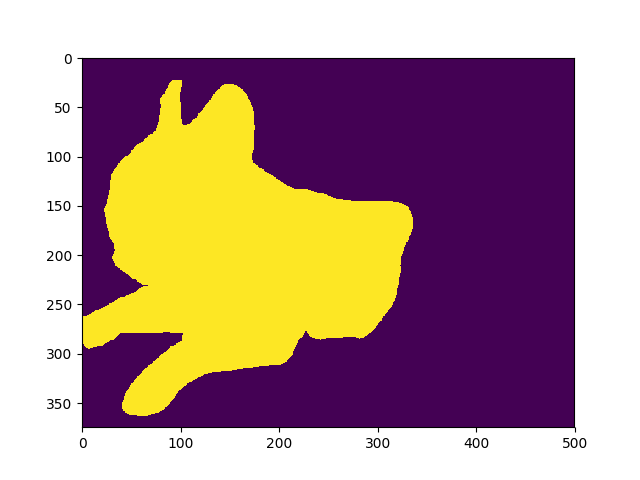

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
image = np.array(Image.open(IMAGE_1))
plt.imshow(image)
plt.show()

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

image = np.array(image)

In [9]:
result = model.predict_mask(image, [[95, 23], [1, 266], [63, 363], [335, 166]])

plt.imshow(result)
plt.show()